In [57]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
#Data Collection
data=pd.read_csv(r"C:\Users\bhavy\Downloads\mail.csv")
print(data.head())
print(data.shape)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)


C:\Users\bhavy\AppData\Local\Temp\ipykernel_18980\2735784718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category',data=data,palette='Set2')


Text(0.5, 1.0, 'Count of Ham vs Spam')

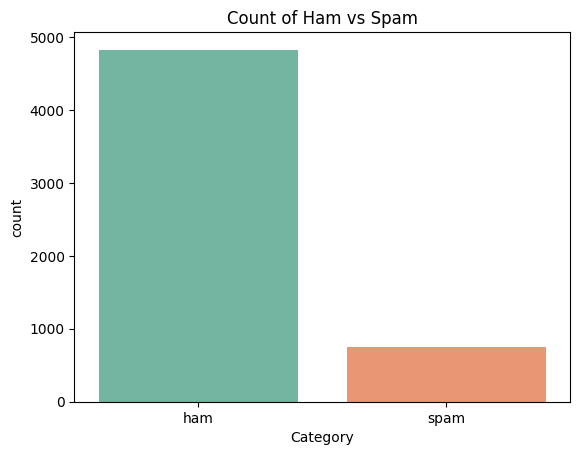

In [59]:
#Data Visualization
sns.countplot(x='Category',data=data,palette='Set2')
plt.title('Count of Ham vs Spam')

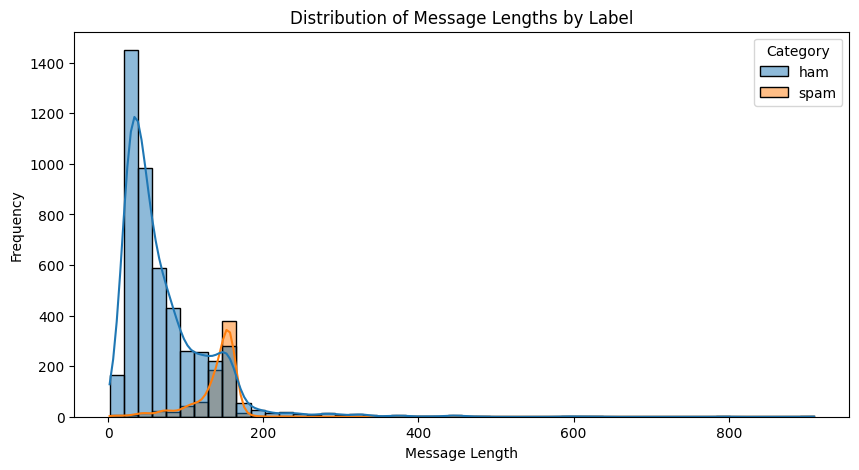

In [60]:
data['message_length'] = data['Message'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='message_length', hue='Category', bins=50, kde=True)
plt.title('Distribution of Message Lengths by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


In [61]:
#Data Preprocessing

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        5572 non-null   object
 1   Message         5572 non-null   object
 2   message_length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [63]:
print(data.describe())

       message_length
count     5572.000000
mean        80.368988
std         59.926946
min          2.000000
25%         35.750000
50%         61.000000
75%        122.000000
max        910.000000


In [64]:
print(data['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


In [70]:
print(data.isnull().sum())

Category          0
Message           0
message_length    0
dtype: int64


In [66]:
data['Category'] = data['Category'].map({'ham': 1, 'spam': 0})

In [67]:
print(data.head())

   Category                                            Message  message_length
0         1  Go until jurong point, crazy.. Available only ...             111
1         1                      Ok lar... Joking wif u oni...              29
2         0  Free entry in 2 a wkly comp to win FA Cup fina...             155
3         1  U dun say so early hor... U c already then say...              49
4         1  Nah I don't think he goes to usf, he lives aro...              61


In [28]:
#Seperating Features and Target
x=data['Message']
y=data['Category']

In [29]:
print(x)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(5572,) (4457,) (1115,)


In [32]:
#Feature extraction
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
x_train_fit=feature_extraction.fit_transform(x_train)
x_test_fit=feature_extraction.transform(x_test)
#y values to integres conversion
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [33]:
print(x_train_fit)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35057 stored elements and shape (4457, 7473)>
  Coords	Values
  (0, 2392)	0.7071067811865476
  (0, 1713)	0.7071067811865476
  (1, 7400)	0.4222407409615414
  (1, 6539)	0.5043342820364712
  (1, 7160)	0.5436306308668579
  (1, 6959)	0.28353533329007485
  (1, 5241)	0.4375307310285687
  (2, 7421)	0.28292332285709515
  (2, 2982)	0.4979815204239224
  (2, 5801)	0.4979815204239224
  (2, 4721)	0.47479780441738884
  (2, 5832)	0.44558977651701576
  (3, 5831)	1.0
  (4, 3177)	0.4237669213702235
  (4, 2788)	0.5342906086326665
  (4, 4157)	0.5534651020906459
  (4, 1583)	0.3549147356597047
  (4, 4738)	0.3204169987043922
  (5, 7105)	0.3146814949645023
  (5, 1757)	0.5045242316078323
  (5, 6415)	0.30653767941680865
  (5, 5720)	0.4810359172341316
  (5, 2297)	0.3741084487077238
  (5, 7131)	0.2506764475916244
  (5, 4009)	0.34391007706121646
  :	:
  (4454, 7410)	0.2934811475046227
  (4454, 1676)	0.30494304541447176
  (4454, 4756)	0.3405469522864689
 

In [34]:
print(x_test_fit)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7451 stored elements and shape (1115, 7473)>
  Coords	Values
  (0, 1826)	0.26085674200205033
  (0, 2342)	0.4417034581331617
  (0, 2881)	0.26051770633962634
  (0, 3486)	0.4555858633647755
  (0, 3755)	0.49870855272331394
  (0, 6959)	0.24194759485074488
  (0, 7207)	0.39265124703425036
  (1, 1842)	0.6201017131974141
  (1, 3488)	0.5387493787126066
  (1, 4743)	0.3713787517229944
  (1, 6544)	0.43278261863790546
  (2, 3972)	1.0
  (3, 1244)	0.23967908225611448
  (3, 1589)	0.2973016168612901
  (3, 2716)	0.5740035323646439
  (3, 3081)	0.2507835262058189
  (3, 3125)	0.2973016168612901
  (3, 3271)	0.20639900507589595
  (3, 3278)	0.27248494199006806
  (3, 3922)	0.26218509131109996
  (3, 3968)	0.24480250655910207
  (3, 5405)	0.24766826711884604
  (3, 6823)	0.25796811779781414
  (4, 1933)	1.0
  (5, 180)	0.42814748161848176
  :	:
  (1109, 5550)	0.32781377326729844
  (1109, 5626)	0.3201444055670381
  (1109, 6018)	0.2363327059589194
  (1109, 6

In [35]:
model=LogisticRegression()

In [43]:
#training model with data
model.fit(x_train_fit,y_train)

LogisticRegression()

In [44]:
#predicting training data
train_pred=model.predict(x_train_fit)

In [45]:
train_accuracy=accuracy_score(train_pred,y_train)

In [46]:
print(train_accuracy)

0.9683643706529056


In [50]:
#Predicting Testing Data
test_pred=model.predict(x_test_fit)

In [51]:
test_accuracy=accuracy_score(test_pred,y_test)
print(test_accuracy)

0.9596412556053812


In [52]:
report=classification_report(y_test,test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       149
           1       0.96      1.00      0.98       966

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



[[105  44]
 [  1 965]]


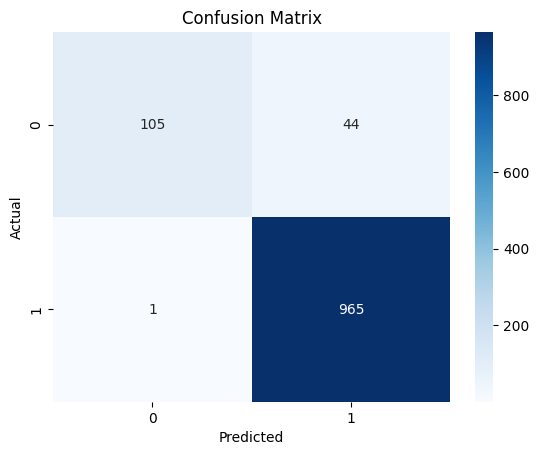

In [54]:
cf_matrix=confusion_matrix(y_test,test_pred)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True,cbar=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
#BUILDING PREDECTIVE SYSTEM
input_mail=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
#converting to numerical values
input_fit=feature_extraction.transform(input_mail)
#making predictions
input_pred=model.predict(input_fit)
print(input_pred)
if input_pred[0]==1:
    print("Its Not Spam Mail")
else:
    print("Its Spam Mail")
    

[0]
Its Spam Mail
